In [6]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import gc
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pylab as plt

from utils_shear_ana import pltutil
from utils_shear_ana import catutil

from splinv.grid import Cartesian
from configparser import ConfigParser

# From catalog to density/shear map
+ download the HSC shape catalog from [this page](http://gfarm.ipmu.jp/~xiangchong.li/S16ACatalogs/galaxy_shape/)
+ Define a pixel size and a padding scale to get the number density map 

In [14]:
data = pyfits.getdata('XMM.fits')
ra, dec=catutil.get_radec(data)

# initialize a plane
configName  =   'proj.ini'
parser      =   ConfigParser()
parser.read(configName)
Grids    =   Cartesian(parser)

# and project ra, dec to the plane
x,y=Grids.setupTanPlane(ra,dec)
z=None
v=None
map1=Grids.pixelize_data(x,y,z,v)[0][0]
ny, nx = map1.shape

Text(0, 0.5, 'dec [deg]')

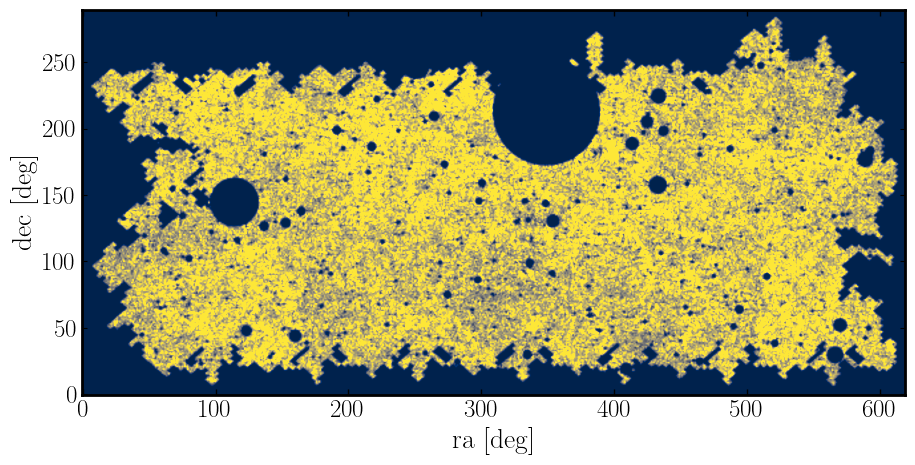

In [15]:
# make a plot
plt.close()
norm=mpl.colors.Normalize(vmin=0, vmax=25)
fig = plt.figure(figsize=(nx//50,ny//50))

cmap='cividis'
interpolate='gaussian'
gcolor='white'
plt.imshow(out1,origin='lower',norm=norm,cmap=cmap,interpolation=interpolate)
plt.xlabel('ra [deg]',fontsize=20)
plt.ylabel('dec [deg]',fontsize=20)